            Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0     12/21/2013         74        60        45            67           49   
1     12/22/2013         56        48        39            43           36   
2     12/23/2013         58        45        32            31           27   
3     12/24/2013         61        46        31            36           28   
4     12/25/2013         58        50        41            44           40   
...          ...        ...       ...       ...           ...          ...   
1314   7/27/2017        103        89        75            71           67   
1315   7/28/2017        105        91        76            71           64   
1316   7/29/2017        107        92        77            72           64   
1317   7/30/2017        106        93        79            70           68   
1318   7/31/2017         99        88        77            66           61   

     DewPointLowF HumidityHighPercent HumidityAvgPercent Humidi

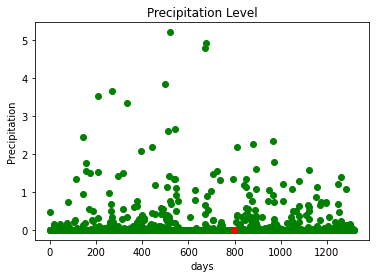

Precipitation vs Selected Atribut


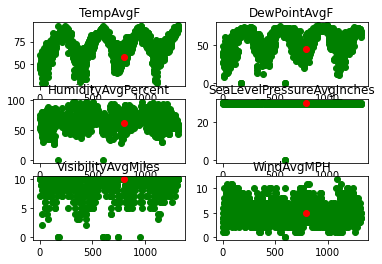

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 


data = pd.read_csv('weather.csv')
print(data)
#menghapus colom yang tidak digunakan
data = data.drop(['Events','Date','SeaLevelPressureHighInches','SeaLevelPressureLowInches'],axis =1)
#print(data)

data = data.replace('T',0.0)
data = data.replace('-',0.0)

#save data to final
data.to_csv('Final_weather.csv')


data =  pd.read_csv('Final_weather.csv')
print(data)

X = data.drop(['PrecipitationSumInches'],axis=1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1,1)

day_index = 798
days = [i for i in range(Y.size)]

Reg = LinearRegression()
Reg.fit(X,Y)

# Random input
inp = np.array([[40],[60],[45],[67],[51],[36],[20],[80],[64],[48],[30.06],[10],[10],[10],[15],[7],[27]])

inp = inp.reshape(1,-1)

#output of random input 
print('Precipitation of input is ', Reg.predict(inp))


print('Precipitaition trend graph :')
plt.scatter(days,Y,color='g')
plt.scatter(days[day_index],Y[day_index],color='r')
plt.title('Precipitation Level')
plt.xlabel('days')
plt.ylabel('Precipitation')
plt.show()



x_f = X.filter (['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH'],axis=1)
print('Precipitation vs Selected Atribut')


for i in range(x_f.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days,x_f[x_f.columns.values[i][:100]],color='g')
    plt.scatter(days[day_index],x_f[x_f.columns.values[i]][day_index],color='r')
    plt.title(x_f.columns.values[i])
plt.show()
                                    
                                    
                                    
                                    
    


In [37]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=23ecd0a52e157531f27d09bff19783ccee053388e1b0afb24a1310a187fa7ebc
  Stored in directory: /home/toto/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
You should consider upgrading via the '/home/toto/project_1/project_1/bin/python -m pip install --upgrade pip' command.
